In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Setup of the NREL version of the 118bus system

Setup of the system:
- For the static analysis:
    - Define system topology
    - Define synchronous generation and converter-interfaced generation installed capacity
    - Define peak and minimum load demand
    - Define lines and transformers ratings
- For the dynamic analysis, in addition to the previous ones:
    - Control parameters and sizing of generators and converters' internal components 

Data for the static analysis is provided by NREL, in [1].
Data for the dynamic analysis is based on adapting conventional values of control parameters and component sizing to the system, by conducting a participation factor analysis to achieve a reasonable level of system stability. 

## References
[1] Pena, Ivonne, Carlo Brancucci Martinez-Anido, and Bri-Mathias Hodge. "An extended IEEE 118-bus test system with high renewable penetration." IEEE Transactions on Power Systems 33.1 (2017): 281-289.


## NREL-118bus System : Information for Static Analysis

Description of the system:
- Number of Regions = 3, (R1, R2, R3)
- Number of buses = 118
- Number of generation units = 53 (54)
- Number of generation units with converter-interfaced generation (CIG) = 18

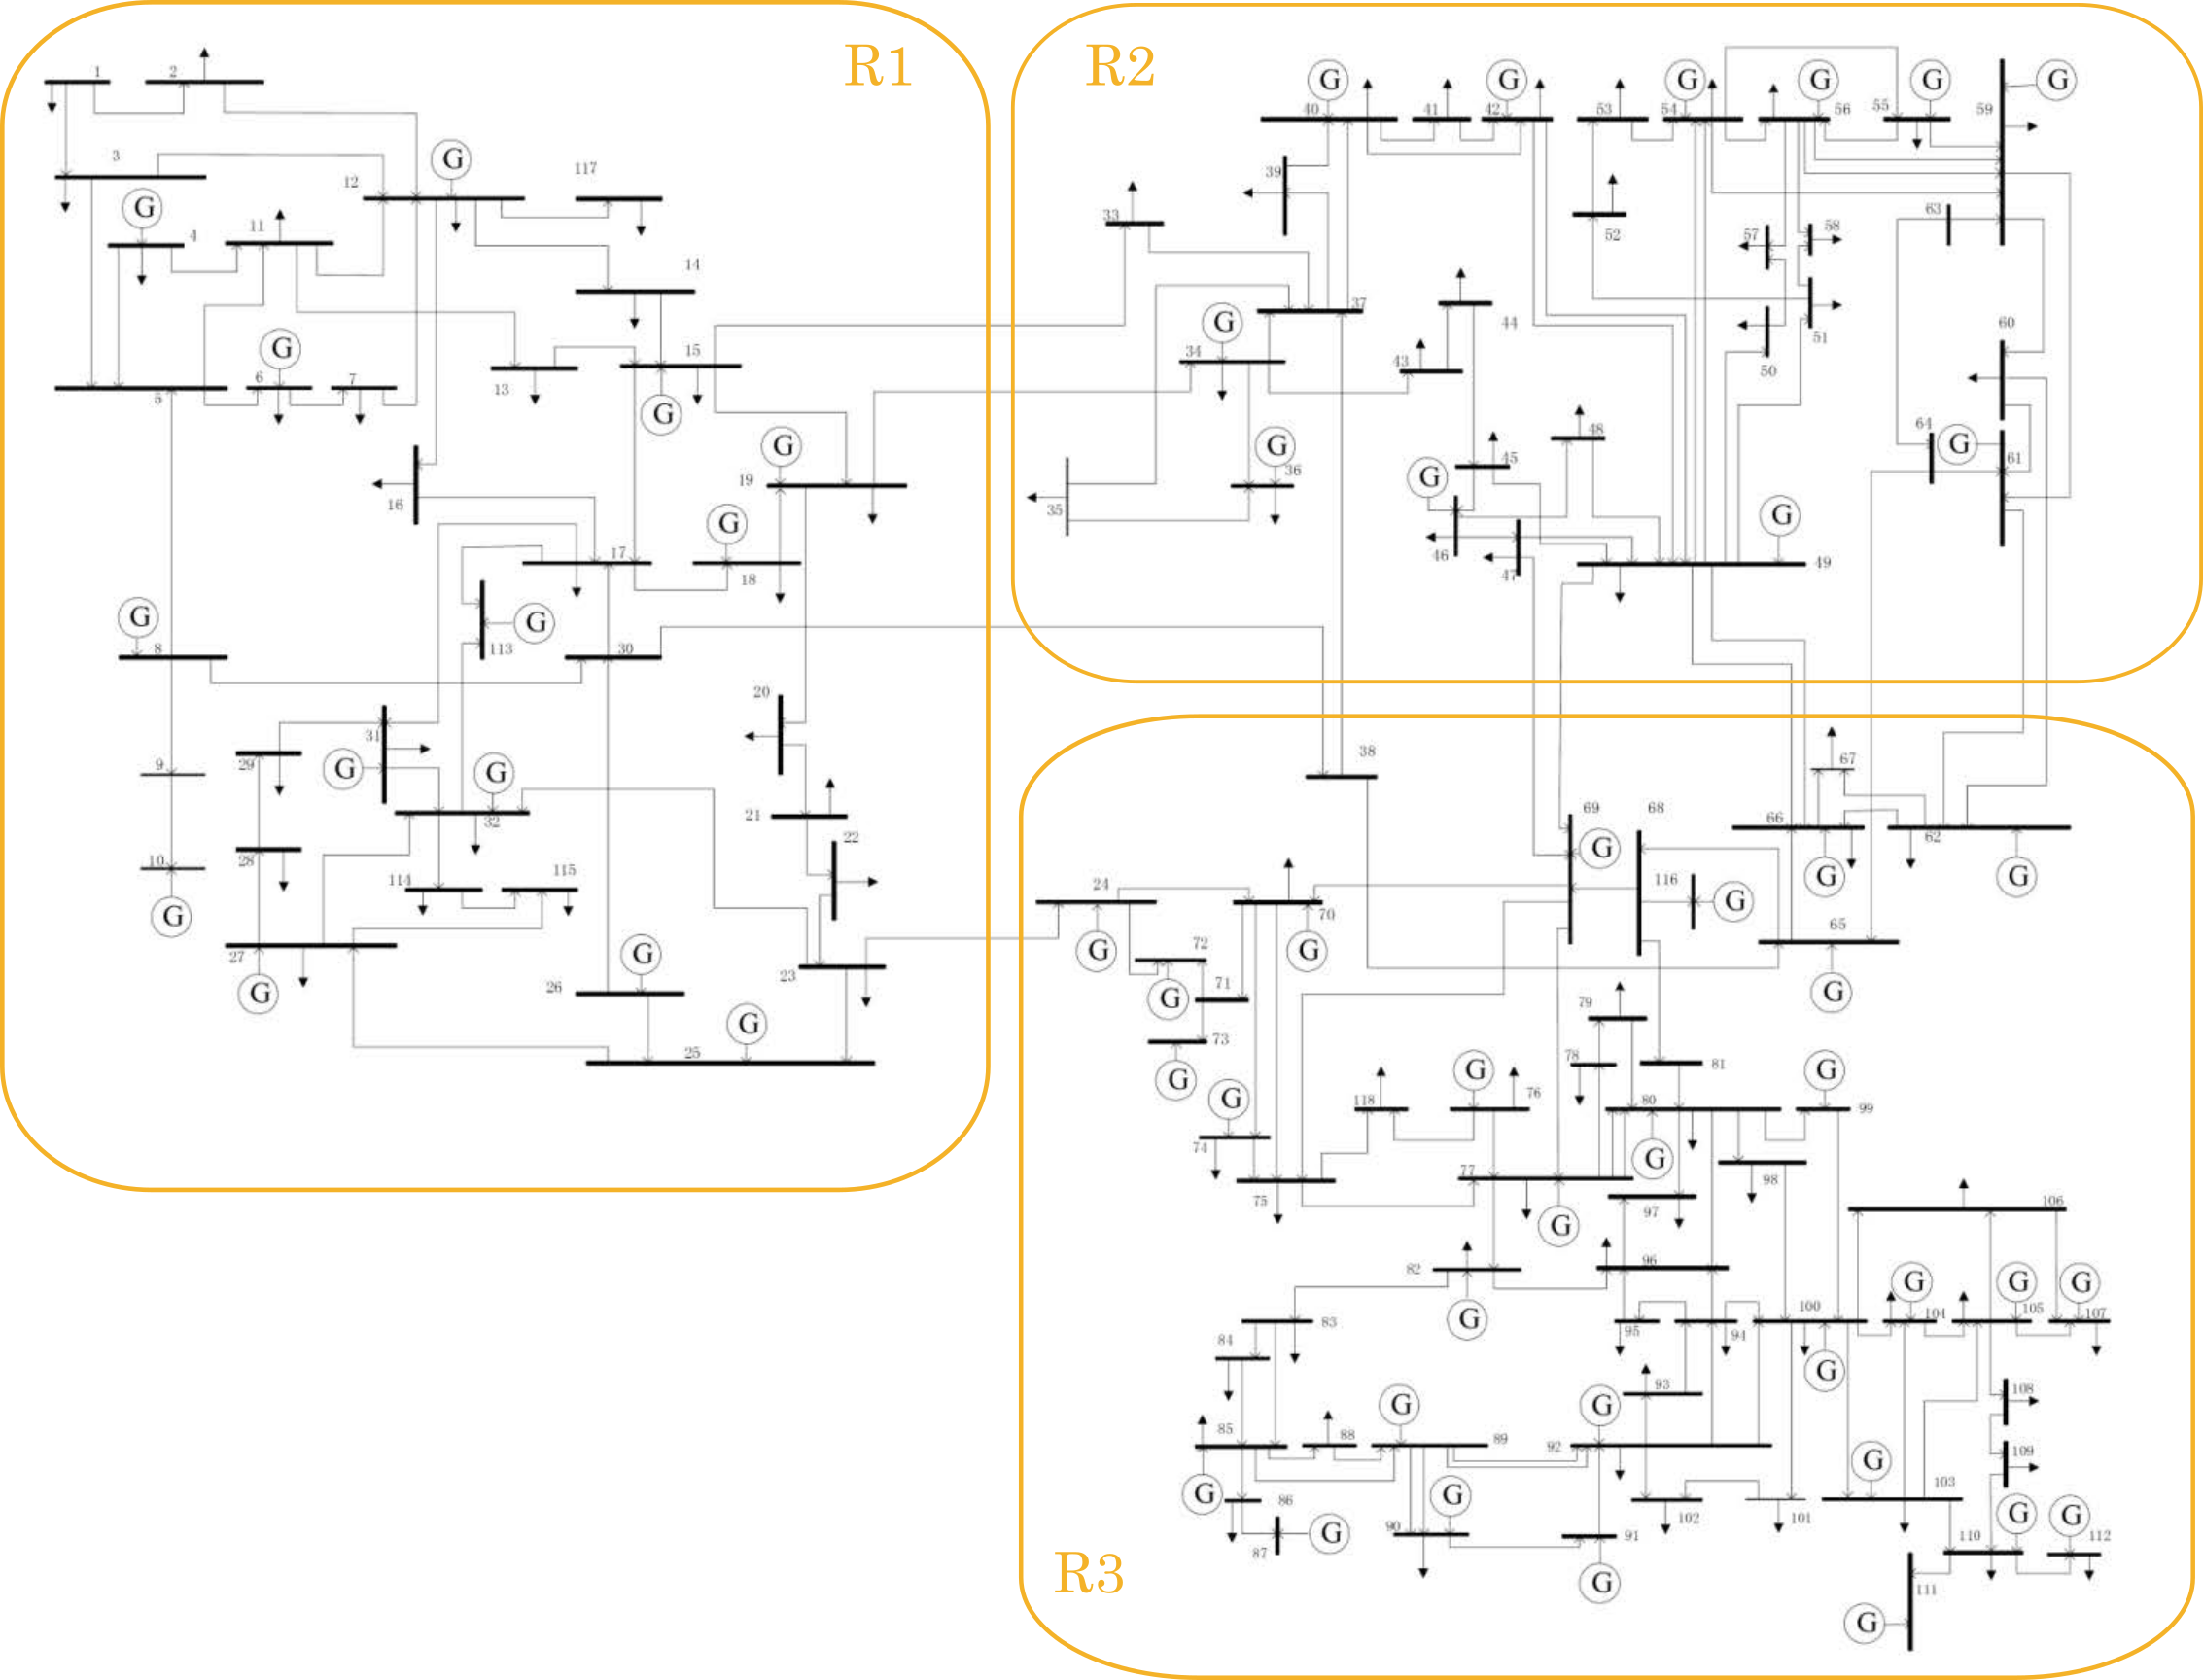

### Buses
List of system buses, with information related to:
- Region: region of the system they belong to
- Load Participation Factor: percentage of the region total demand absorbed by the load in the bus 


In [2]:
Buses=pd.read_csv('Buses.csv')
Buses

,Bus Name,Region,Load Participation Factor
0,bus026,R1,0.000000
1,bus010,R1,0.000000
2,bus025,R1,0.000000
3,bus012,R1,0.043466
4,bus015,R1,0.083238
...,...,...,...
113,bus093,R3,0.016137
114,bus084,R3,0.014792
115,bus109,R3,0.010758
116,bus102,R3,0.006724


In [3]:
for i in range(len(Buses)):
    Buses.loc[i,'Num']=int(Buses.loc[i,'Bus Name'][3:])

Buses=Buses.sort_values(by='Bus Name').reset_index(drop=True)

#pd.DataFrame.to_excel(Buses,'G:/Il mio Drive/Francesca 118 v2/Operation/tool_ree/tool_ree/Buses.xlsx')

Buses

,Bus Name,Region,Load Participation Factor,Num
0,bus001,R1,0.047169,1.0
1,bus002,R1,0.018496,2.0
2,bus003,R1,0.036069,3.0
3,bus004,R1,0.027749,4.0
4,bus005,R1,0.000000,5.0
...,...,...,...,...
113,bus114,R1,0.007397,114.0
114,bus115,R1,0.020343,115.0
115,bus116,R2,0.000000,116.0
116,bus117,R1,0.018496,117.0


### Loads
Hourly load consumption for one year, aggregated for system's region

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


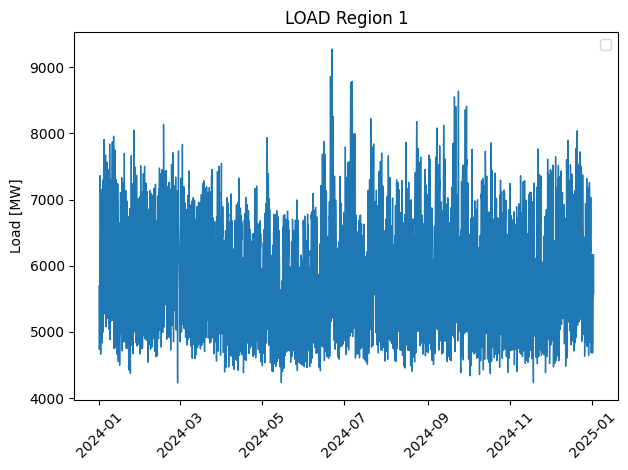

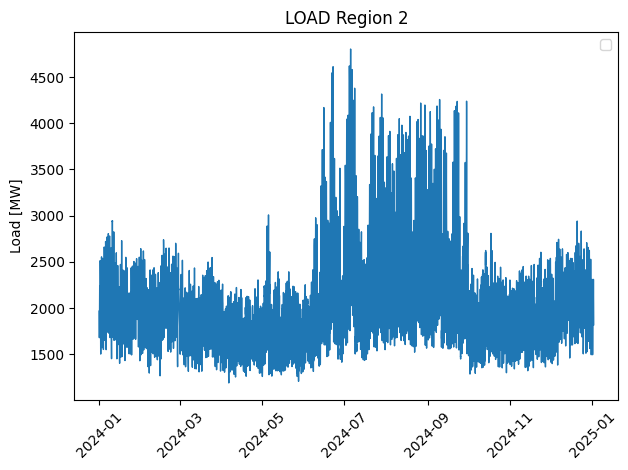

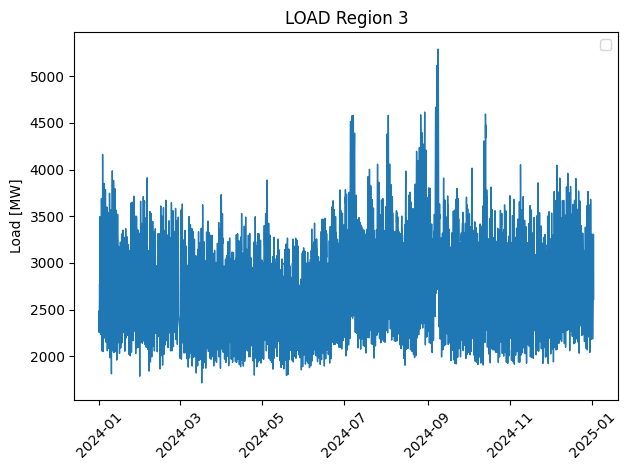

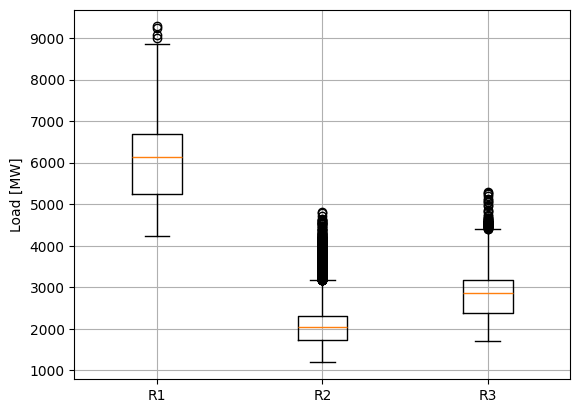

In [4]:
Loads=pd.DataFrame()

for zone in [1,2,3]:

    Loads_R=pd.read_csv('./input-files/Input files/RT/Load/LoadR'+str(zone)+'RT.csv')
    
    Loads_R["DATETIME"] = pd.to_datetime(Loads_R["DATETIME"])
    
    Loads_R=Loads_R.set_index(["DATETIME"]).sort_index()
    
    Loads['R'+str(zone)]=Loads_R
        
    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(Loads_R.index,Loads_R['value'], linewidth=1)
    plt.legend()
    ax.set_title('LOAD Region '+str(zone))  
    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    ax.set_ylabel('Load [MW]')
    fig.tight_layout()
    
fig=plt.figure()
ax=fig.add_subplot()
ax.boxplot(Loads)
ax.set_ylabel('Load [MW]')
plt.xticks([1, 2,3], list(Loads.columns))
ax.grid()


List of buses with load

In [5]:
Buses=Buses.rename(columns={"Load Participation Factor": "Load_Participation_Factor"}) 
loads_nrel=Buses.query('Load_Participation_Factor !=0')

loads_nrel

,Bus Name,Region,Load_Participation_Factor,Num
0,bus001,R1,0.047169,1.0
1,bus002,R1,0.018496,2.0
2,bus003,R1,0.036069,3.0
3,bus004,R1,0.027749,4.0
5,bus006,R1,0.048092,6.0
...,...,...,...,...
111,bus112,R3,0.033619,112.0
113,bus114,R1,0.007397,114.0
114,bus115,R1,0.020343,115.0
116,bus117,R1,0.018496,117.0


### Generators
List of generators indicating:
- Node of connection: bus to which they are connected --> Num: number oft the bus
- Max Capacity (MW): corresponding to the installed capacity (nominal power, Sn) of the generator
- Type: type of generator

In [6]:
Generators=pd.read_excel('Generators_red.xlsx') #Reduced because useless columns have been discarded

for i in range(len(Generators)):
    Generators.loc[i,'Num']=int(Generators.loc[i,'Node of connection'][4:])
    Generators.loc[i,'Type']=Generators.loc[i,'Generator Name'][:-3]
    bus_num=int(Generators.loc[i,'Node of connection'][4:])
    Generators.loc[i,'Generator Name'][:-3]
    Generators.loc[i,'Region']=list(Buses.query('Num == @bus_num')['Region'])[0]

Generators

,Generator Name,Node of connection,Category,Units,Max Capacity (MW),Commit,Min Stable Level (MW),Num,Type,Region
0,Biomass 01,node012,1. Committed DA,1,3.0,0,0.90,12.0,Biomass,R1
1,Biomass 02,node012,1. Committed DA,1,3.0,0,0.90,12.0,Biomass,R1
2,Biomass 03,node103,1. Committed DA,1,1.2,0,0.36,103.0,Biomass,R3
3,Biomass 04,node103,1. Committed DA,1,1.2,0,0.36,103.0,Biomass,R3
4,Biomass 05,node012,1. Committed DA,1,1.3,0,0.26,12.0,Biomass,R1
...,...,...,...,...,...,...,...,...,...,...
322,Wind 13,node031,Wind,1,58.7,1,0.00,31.0,Wind,R1
323,Wind 14,node100,Wind,1,400.0,1,0.00,100.0,Wind,R3
324,Wind 15,node082,Wind,1,50.0,1,0.00,82.0,Wind,R3
325,Wind 16,node082,Wind,1,149.5,1,0.00,82.0,Wind,R3


In [7]:
#%% Hydro data from plexos xsl
plexos_data=pd.read_excel('plexos-export.xls',sheet_name='Properties')
hydro_plants=[hydro for hydro in plexos_data['child_object'].unique() if hydro.startswith('Hydro')]
Generators=Generators.rename(columns={'Generator Name':'GeneratorName'})

for hydro_plant in hydro_plants:
    max_capacity= plexos_data.query('child_object == @hydro_plant and property == "Max Capacity"')['value'].max()
    Generators.loc[Generators.query('GeneratorName == @hydro_plant').index[0],'Max Capacity (MW)']=max_capacity

In [8]:
types_of_gens=Generators['Type'].unique()
print(types_of_gens)

['Biomass' 'CC NG' 'CT NG' 'CT Oil' 'Geo' 'Hydro' 'ICE NG' 'Solar'
 'ST Coal' 'ST NG' 'ST Other' 'Wind']


Sum of the installed capacity in each bus:
- For each type of generator: columns from 'Biomass (MW)' to 'ST Other (MW)'
- For all non renewable synchronous generators: column 'NRES_SG'
- For all renewable synchronous generators: column 'RES_SG'
- For all synchronous generators: column 'Pmax_TOT_SG' (--> Total SG installed capacity in the bus)
- for all converter-interfaced genetors: column 'Pmax_CIG' (--> Total CIG installed capacity in the bus)
- For all generators: column 'Pmax_TOT' (--> Total installed capacity in the bus)

In [9]:
nodes_of_connections=Generators['Node of connection'].unique()
Generators=Generators.rename(columns={'Node of connection':'Node_of_connection'})

Generators_NREL=pd.DataFrame()

for i in range(0,len(nodes_of_connections)):
    node=nodes_of_connections[i]
    bus=int(node[4:])
    Generators_NREL.loc[i,'BusNum']=bus
    Generators_NREL.loc[i,'Region']=list(Buses.query('Num == @bus')['Region'])[0]
    for t in types_of_gens:
        Generators_NREL.loc[i,t+' (MW)']=sum(Generators.query('Node_of_connection==@node and Type == @t')['Max Capacity (MW)'])

NRES_SG=['CC NG (MW)', 'CT NG (MW)', 'CT Oil (MW)', 'ICE NG (MW)', 'ST Coal (MW)', 'ST NG (MW)', 'ST Other (MW)']
RES_SG=['Geo (MW)', 'Hydro (MW)','Biomass (MW)']
TOT_SG=['Geo (MW)', 'Hydro (MW)','Biomass (MW)', 'CC NG (MW)', 'CT NG (MW)', 'CT Oil (MW)', 'ICE NG (MW)', 'ST Coal (MW)', 'ST NG (MW)', 'ST Other (MW)']
CIG=['Wind (MW)','Solar (MW)']

Generators_NREL['NRES_SG']=Generators_NREL[NRES_SG].sum(axis=1)
Generators_NREL['RES_SG']=Generators_NREL[RES_SG].sum(axis=1)
Generators_NREL['Pmax_TOT_SG']=Generators_NREL[TOT_SG].sum(axis=1)
Generators_NREL['Pmax_CIG']=Generators_NREL[CIG].sum(axis=1)
Generators_NREL['Pmax_TOT']=Generators_NREL['Pmax_CIG']+Generators_NREL['Pmax_TOT_SG']
Generators_NREL

,BusNum,Region,Biomass (MW),CC NG (MW),CT NG (MW),CT Oil (MW),Geo (MW),Hydro (MW),ICE NG (MW),Solar (MW),ST Coal (MW),ST NG (MW),ST Other (MW),Wind (MW),NRES_SG,RES_SG,Pmax_TOT_SG,Pmax_CIG,Pmax_TOT
0,12.0,R1,58.25,1642.78,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1642.78,58.25,1701.03,0.00,1701.03
1,103.0,R3,40.17,55.10,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,55.10,40.17,95.27,0.00,95.27
2,34.0,R2,16.50,27.00,0.00,0.0,0.0,4.22,8.40,0.00,0.0,0.00,0.0,0.0,35.40,20.72,56.12,0.00,56.12
3,74.0,R1,0.00,100.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,100.00,0.00,100.00,0.00,100.00
4,112.0,R3,0.00,14.30,104.40,0.0,0.0,6.00,3.25,175.80,0.0,0.00,0.0,0.0,121.95,6.00,127.95,175.80,303.75
5,107.0,R3,0.00,834.00,7.39,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,841.39,0.00,841.39,0.00,841.39
6,36.0,R2,0.00,71.51,82.40,0.0,0.0,8.75,0.00,0.00,0.0,0.00,0.0,0.0,153.91,8.75,162.66,0.00,162.66
7,66.0,R2,0.00,596.40,0.00,0.0,0.0,77.00,0.00,0.00,0.0,0.00,0.0,0.0,596.40,77.00,673.40,0.00,673.40
8,46.0,R2,0.00,150.00,0.00,0.0,0.0,9.08,0.00,0.00,0.0,0.00,0.0,0.0,150.00,9.08,159.08,0.00,159.08
9,49.0,R2,0.00,262.95,50.40,0.0,0.0,82.00,0.00,0.00,0.0,0.00,0.0,0.0,313.35,82.00,395.35,0.00,395.35


- Pmax_SG: installed capacity of SG
- Pmax_CIG: installed capacity of CIG

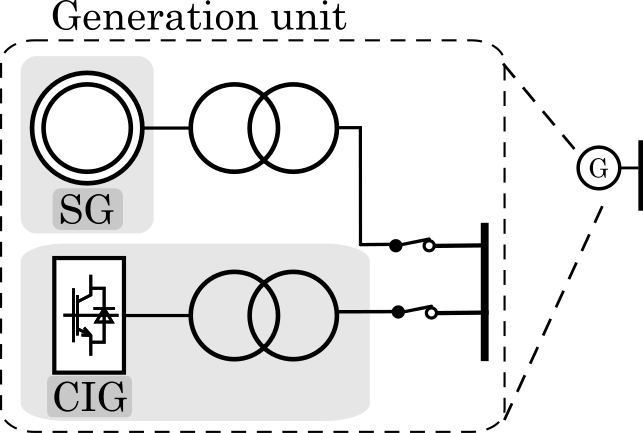

#### Wind, Solar, and Hydro Generation
Hourly generation (of each generator) for one year (Information that is not used for the setup but can be used for the implementation of the optimization)

In [9]:
from os import listdir
from os.path import isfile, join

def res_gen(res,df):
    path='./input-files/Input files/RT/'+res+'/'
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

    onlyfiles=list(set(onlyfiles)-set(['.DS_Store']))
    
    for file in onlyfiles:
        df_i=pd.read_csv(path+file)
        
        df_i["DATETIME"] = pd.to_datetime(df_i["DATETIME"])
        
        df_i=df_i.set_index(["DATETIME"]).sort_index()
        
        df[file[:-6]]=df_i
        
    return df
           
Solar=pd.DataFrame()
Wind=pd.DataFrame()
Hydro=pd.DataFrame()
    
Solar=res_gen('Solar',Solar)
Wind=res_gen('Wind',Wind)
Hydro=res_gen('Hydro',Wind)

In [10]:
Wind

,Wind11,Wind3,Wind6,Wind10,Wind13,Wind2,Wind17,Wind12,Wind9,Wind16,Wind4,Wind14,Wind1,Wind7,Wind8,Wind5,Wind15,Hydro
DATETIME,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,5.058859,2.477267,0.877676,12.765404,1.687492,3.724274,9.669997,0.822722,11.693075,0.297516,0.769740,4.500030,0.458135,1.942837,13.847484,0.902116,8.252688,0.02212
2024-01-01 01:00:00,9.208173,3.031204,2.008854,13.682279,4.078827,8.090245,5.947432,3.046363,12.962309,0.051735,1.013277,6.411089,0.900835,4.622050,14.572063,0.951623,8.222057,0.02133
2024-01-01 02:00:00,9.190788,3.089380,2.794547,12.681899,5.380704,13.335597,3.205198,9.545811,11.407550,0.000000,0.506920,11.625729,2.412459,6.191502,13.677956,0.904939,8.338495,0.02142
2024-01-01 03:00:00,9.695205,2.486115,9.659556,14.305784,26.623678,23.850555,2.940856,53.627804,13.585817,1.635511,0.367775,26.558630,5.340160,9.045088,15.210591,0.978896,9.373620,0.02160
2024-01-01 04:00:00,9.710853,2.629418,10.975506,12.569062,29.804588,23.962612,0.815381,51.880845,11.807606,3.470530,0.349065,25.271533,5.856456,9.334108,14.149706,0.906345,8.275774,0.02162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01 19:00:00,0.000000,1.546054,0.678839,0.000000,2.388373,0.000000,29.618573,8.322766,0.000000,10.629521,0.239122,14.386462,0.000780,0.000204,0.000000,0.000000,27.048672,0.07282
2025-01-01 20:00:00,0.000407,3.779966,0.702487,0.000000,2.684599,0.000000,8.286292,4.277697,0.000000,6.808885,0.730586,6.112000,0.002851,0.003298,0.000000,0.000000,25.178994,0.07312
2025-01-01 21:00:00,0.000000,5.598673,0.644244,0.000000,1.392421,0.000000,2.778807,1.525636,0.001902,4.329162,1.788015,1.310316,0.002244,0.003825,0.000000,0.000000,23.885157,0.07341


### Summary
#### Regions description

In [10]:
def regions_description(reg_list,Generators, Loads, Buses, regions=pd.DataFrame(),regions_gen_perc=pd.DataFrame(), regions_red=pd.DataFrame()):
    for r in range(len(reg_list)):
        R=reg_list[r]
        regions.loc[r,'Region']=R
        regions_gen_perc.loc[r,'Region']=R
        gen_reg=Generators.query('Region == @R')
        regions.loc[r,'N_gens']=len(gen_reg)
        regions.loc[r,'N_Wind']=len(gen_reg.query('Type == "Wind"'))
        regions.loc[r,'N_Solar']=len(gen_reg.query('Type == "Solar"'))
        
        
        buses_reg=[int(bus.replace('node','')) for bus in gen_reg['Node_of_connection'].unique()]
        regions.loc[r,'Buses list']=str(buses_reg)
        regions.loc[r,'Num_Bus_gen']=len(buses_reg)
        
        
        regions.loc[r,'Capacity (MW)']=gen_reg['Max Capacity (MW)'].sum()
     
        regions.loc[r,'Peak Load (MW)']=Loads[R].max()
        regions.loc[r,'Min Load (MW)']=Loads[R].min()
    
         
        for t in types_of_gens:#TOT_SG+CIG:
            regions_gen_perc.loc[r,t+' [%]']=sum(gen_reg.query('Type == @t')['Max Capacity (MW)'])/regions.loc[r,'Capacity (MW)']*100
            regions.loc[r,t+' [MW]']=sum(gen_reg.query('Type == @t')['Max Capacity (MW)'])
            
        regions_gen_perc.loc[r,'NRES_SG [%]']= sum(regions_gen_perc.loc[r,NRES_SG_perc])
        regions_gen_perc.loc[r,'RES_SG [%]']= sum(regions_gen_perc.loc[r,RES_SG_perc])
        regions.loc[r,'TOT_SG [%]']= sum(regions_gen_perc.loc[r,TOT_SG_perc])
        regions_gen_perc.loc[r,'CIG [%]']= sum(regions_gen_perc.loc[r,CIG_perc])
    
        regions.loc[r,'NRES_SG [MW]']= sum(regions.loc[r,NRES_SG])
        regions.loc[r,'RES_SG [MW]']= sum(regions.loc[r,RES_SG])
        regions.loc[r,'TOT_SG [MW]']= sum(regions.loc[r,TOT_SG])
        regions.loc[r,'CIG [MW]']= sum(regions.loc[r,CIG])
        
        regions.loc[r,'NRES_SG [%]']= regions_gen_perc.loc[r,'NRES_SG [%]']
        regions.loc[r,'RES_SG [%]']= regions_gen_perc.loc[r,'RES_SG [%]']
        regions.loc[r,'CIG [%]']= regions_gen_perc.loc[r,'CIG [%]'] 
        regions.loc[r,'TOT_SG [%]']= regions.loc[r,'TOT_SG [%]']

        regions_red=regions.drop(TOT_SG+CIG,axis=1)

    return regions, regions_gen_perc, regions_red

def pie_plot(y,labels,title,labels_flag):
    fig=plt.figure()
        
    if labels_flag:
        p, tx, autotexts = plt.pie(y, labels=labels,textprops={'fontsize': 20},
                autopct="", shadow=True)
        for i, a in enumerate(autotexts):
            a.set_text("{0:.0f}".format(np.array(y)[i]))
    else:
        p, tx, autotexts = plt.pie(y, textprops={'fontsize': 20},
                autopct="", shadow=True)
        plt.legend(labels)
        
    plt.title(title,fontsize=20)
    
    fig.tight_layout

In [11]:
NRES_SG=['CC NG [MW]', 'CT NG [MW]', 'CT Oil [MW]', 'ICE NG [MW]', 'ST Coal [MW]', 'ST NG [MW]', 'ST Other [MW]']
RES_SG=['Geo [MW]', 'Hydro [MW]','Biomass [MW]']
TOT_SG=['Geo [MW]', 'Hydro [MW]','Biomass [MW]', 'CC NG [MW]', 'CT NG [MW]', 'CT Oil [MW]', 'ICE NG [MW]', 'ST Coal [MW]', 'ST NG [MW]', 'ST Other [MW]']
CIG=['Wind [MW]','Solar [MW]']

NRES_SG_perc=['CC NG [%]', 'CT NG [%]', 'CT Oil [%]', 'ICE NG [%]', 'ST Coal [%]', 'ST NG [%]', 'ST Other [%]']
RES_SG_perc=['Geo [%]', 'Hydro [%]','Biomass [%]']
TOT_SG_perc=['Geo [%]', 'Hydro [%]','Biomass [%]', 'CC NG [%]', 'CT NG [%]', 'CT Oil [%]', 'ICE NG [%]', 'ST Coal [%]', 'ST NG [%]', 'ST Other [%]']
CIG_perc=['Wind [%]','Solar [%]']


reg_list=['R1','R2','R3']
regions=pd.DataFrame()
regions_gen_perc=pd.DataFrame()

regions, regions_gen_perc, regions_red= regions_description(reg_list, Generators, Loads, Buses)


In [31]:
regions

#- N_gens: number of generators (not generation units) installed in the region
#- N_Wind, N_Solar: number of wind/solar power plants
#- Buses list: list of buses with a generator unit
#- Num_Bus_gen: number of buses with generator unit
#- Capacity (MW): total installed generation capacity of the region
#- Peak Load (MW), Min Load (MW): peak and minimum load of the region
#- total installed capacity of the region, differentiated by type of generator
#- total NRES_SG, RES_SG, TOT_SG, TOT_CIG per region, in MW and in percentage


,Region,N_gens,N_Wind,N_Solar,Buses list,Num_Bus_gen,Capacity (MW),Peak Load (MW),Min Load (MW),Biomass [MW],...,ST Other [MW],Wind [MW],TOT_SG [%],NRES_SG [MW],RES_SG [MW],TOT_SG [MW],CIG [MW],NRES_SG [%],RES_SG [%],CIG [%]
0,R1,136.0,13.0,33.0,"[12, 74, 25, 113, 26, 10, 4, 18, 6, 8, 32, 15,...",18.0,10522.99,9276.327882,4228.311838,58.25,...,35.0,328.9,85.414127,8929.07,59.05,8988.12,1534.87,84.852974,0.561152,14.585873
1,R2,72.0,0.0,5.0,"[34, 36, 66, 46, 49, 65, 40, 62, 55, 42, 54, 5...",20.0,5638.65,4803.546377,1190.362815,16.50,...,0.0,0.0,92.119213,2311.16,2883.12,5194.28,444.37,40.987825,51.131388,7.880787
2,R3,119.0,4.0,37.0,"[103, 112, 107, 100, 89, 90, 87, 85, 91, 111, ...",15.0,8557.63,5290.274654,1715.314180,40.17,...,0.0,749.0,70.267118,5967.03,46.17,6013.20,2544.43,69.727600,0.539519,29.732882


In [13]:
regions_red

,Region,N_gens,N_Wind,N_Solar,Buses list,Num_Bus_gen,Capacity (MW),Peak Load (MW),Min Load (MW),TOT_SG [%],NRES_SG [MW],RES_SG [MW],TOT_SG [MW],CIG [MW],NRES_SG [%],RES_SG [%],CIG [%]
0,R1,136.0,13.0,33.0,"[12, 74, 25, 113, 26, 10, 4, 18, 6, 8, 32, 15,...",18.0,10522.99,9276.327882,4228.311838,85.414127,8929.07,59.05,8988.12,1534.87,84.852974,0.561152,14.585873
1,R2,72.0,0.0,5.0,"[34, 36, 66, 46, 49, 65, 40, 62, 55, 42, 54, 5...",20.0,5638.65,4803.546377,1190.362815,92.119213,2311.16,2883.12,5194.28,444.37,40.987825,51.131388,7.880787
2,R3,119.0,4.0,37.0,"[103, 112, 107, 100, 89, 90, 87, 85, 91, 111, ...",15.0,8557.63,5290.274654,1715.314180,70.267118,5967.03,46.17,6013.20,2544.43,69.727600,0.539519,29.732882


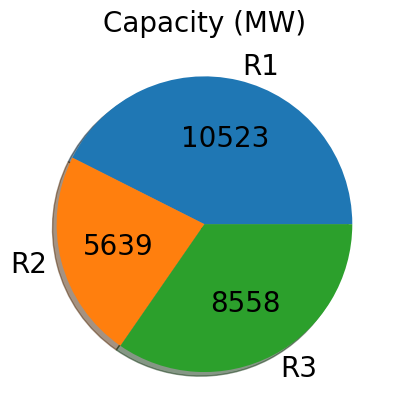

In [24]:
title='Capacity (MW)'
y = regions[title]
mylabels = regions['Region']

pie_plot(y,mylabels,title,labels_flag=1)

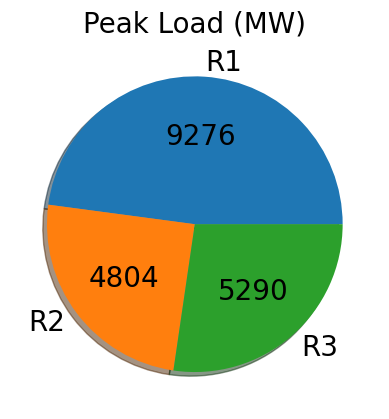

In [25]:
title='Peak Load (MW)'
y = regions[title]
mylabels = regions['Region']

pie_plot(y,mylabels,title,labels_flag=1)

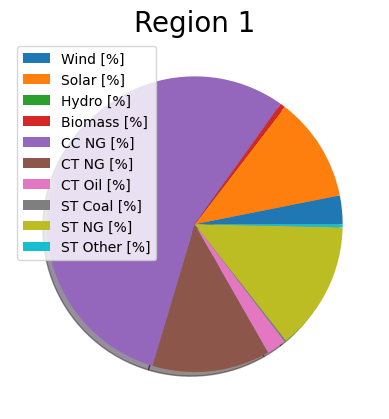

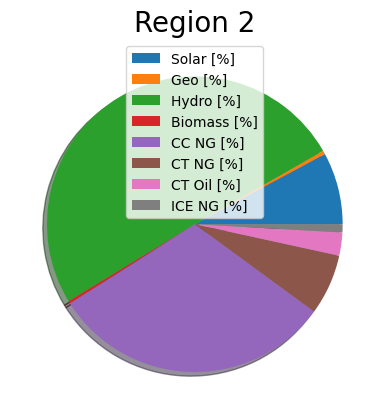

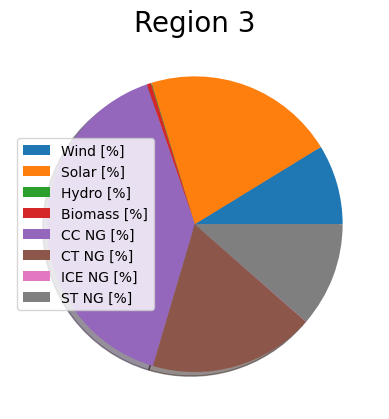

In [27]:
for r in range(1,len(reg_list)+1):
    title='Region '+str(r)
    y = regions_gen_perc.loc[r-1,CIG_perc+TOT_SG_perc][regions_gen_perc.loc[r-1,CIG_perc+TOT_SG_perc]!=0]
    mylabels = y.index
    
    pie_plot(y,mylabels,title,labels_flag=0)

In [19]:
def create_OpDataExcel(Buses, Generators_sys, columns_order):

    T_Loads=Buses.query('Load_Participation_Factor !=00')
    T_Loads['Load_Participation_Factor']=T_Loads['Load_Participation_Factor']/3
    T_Buses=Buses[['Bus Name','Region']]

    T_Gen=Generators_sys[['BusNum','Pmax_CIG']]
    # T_Gen['BusName']=Generators_sys[['BusName']]
    T_Gen['Pmax_SG']=Generators_sys['Pmax_TOT_SG']
    T_Gen['Pmax']=np.array(T_Gen[['Pmax_SG']])+np.array(T_Gen[['Pmax_CIG']])
    T_Gen['Snom']=T_Gen['Pmax']/0.95
    T_Gen['Snom_SG']=T_Gen['Pmax_SG']/0.95
    T_Gen['Snom_CIG']=T_Gen['Pmax_CIG']/0.95
    T_Gen['Pmin']=T_Gen['Snom']*0.2
    T_Gen['Pmin_SG']=T_Gen['Snom_SG']*0.2
    T_Gen['Pmin_CIG']=T_Gen['Snom_CIG']*0.2
    T_Gen['Qmax']=T_Gen['Pmax']*0.33
    T_Gen['Qmin']=-T_Gen['Pmin']*0.33
    T_Gen['Region']=Generators_sys['Region']    
    T_Gen=T_Gen[columns_order]
    
    return T_Gen, T_Loads, T_Buses

#### Tables with information about Generators, Loads, and Buses to be provided to the Data Generation Tool

In [32]:
columns_order=['BusNum','Snom_SG','Snom_CIG','Snom','Pmax','Pmin','Qmax','Qmin','Region','Pmax_SG','Pmax_CIG','Pmin_SG','Pmin_CIG']#'BusName',

T_Gen, T_Loads, T_Buses = create_OpDataExcel(Buses, Generators_NREL, columns_order)

- BusNum: number of the bus
- Pmax_SG, Pmax_CIG = maximum capacity of SG and CIG in the bus (MW)
- Pmax = Pmax_SG + Pmax_CIG
- Snom_SG: total SG rated power (in MVA) = Pmax_SG/0.95
- Snom_CIG: total CIG rated power (in MVA) = Pmax_CIG/0.95
- Snom = Snom_SG + Snom_CIG
- Pmin_SG = 20% of Snom_SG
- Pmin_CIG = 20% of Snom_SG
- Pmin = Pmin_SG + Pmin_CIG
- Qmax = 0.33*Pmax (assume cos(phi)=0.95)
- Qmin = -0.33*Pmax (assume cos(phi)=0.95)

In [33]:
T_Gen

,BusNum,Snom_SG,Snom_CIG,Snom,Pmax,Pmin,Qmax,Qmin,Region,Pmax_SG,Pmax_CIG,Pmin_SG,Pmin_CIG
0,12.0,1790.557895,0.000000,1790.557895,1701.03,358.111579,561.3399,-118.176821,R1,1701.03,0.00,358.111579,0.000000
1,103.0,100.284211,0.000000,100.284211,95.27,20.056842,31.4391,-6.618758,R3,95.27,0.00,20.056842,0.000000
2,34.0,59.073684,0.000000,59.073684,56.12,11.814737,18.5196,-3.898863,R2,56.12,0.00,11.814737,0.000000
3,74.0,105.263158,0.000000,105.263158,100.00,21.052632,33.0000,-6.947368,R1,100.00,0.00,21.052632,0.000000
4,112.0,134.684211,185.052632,319.736842,303.75,63.947368,100.2375,-21.102632,R3,127.95,175.80,26.936842,37.010526
5,107.0,885.673684,0.000000,885.673684,841.39,177.134737,277.6587,-58.454463,R3,841.39,0.00,177.134737,0.000000
6,36.0,171.221053,0.000000,171.221053,162.66,34.244211,53.6778,-11.300589,R2,162.66,0.00,34.244211,0.000000
7,66.0,708.842105,0.000000,708.842105,673.40,141.768421,222.2220,-46.783579,R2,673.40,0.00,141.768421,0.000000
8,46.0,167.452632,0.000000,167.452632,159.08,33.490526,52.4964,-11.051874,R2,159.08,0.00,33.490526,0.000000
9,49.0,416.157895,0.000000,416.157895,395.35,83.231579,130.4655,-27.466421,R2,395.35,0.00,83.231579,0.000000


Loads with Load_Participation_Factor as a fraction of total power demand

In [22]:
T_Loads

,Bus Name,Region,Load_Participation_Factor,Num
0,bus001,R1,0.015723,1.0
1,bus002,R1,0.006165,2.0
2,bus003,R1,0.012023,3.0
3,bus004,R1,0.009250,4.0
5,bus006,R1,0.016031,6.0
...,...,...,...,...
111,bus112,R3,0.011206,112.0
113,bus114,R1,0.002466,114.0
114,bus115,R1,0.006781,115.0
116,bus117,R1,0.006165,117.0


In [23]:
T_Buses

,Bus Name,Region
0,bus001,R1
1,bus002,R1
2,bus003,R1
3,bus004,R1
4,bus005,R1
...,...,...
113,bus114,R1
114,bus115,R1
115,bus116,R2
116,bus117,R1


## NREL-118bus System: Information for Dynamic Analysis
Conventional values (i.e. default values in the tool excel file) of control parameters and component sizing were adjusted after performing the small-signal stability assessment (eigenvalues and participation factors analysis) of several operating points.

### Model of the GFOL Converter:
All the unstable cases showed high participation of the state variables related to the PLL (GFOLN_etheta_x). Therefore, the PLL has been made slower (with tau_pll=0.4 s). Coherently, the active power and reactive power control time constants have been increased.

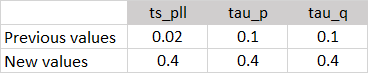

### Model of the GFOR Converter:
Many unstable cases showed high participation of state variables related to the current of GFOR converters on the grid side (GFORN_ig_). Therefore, the resistance of the transformer connecting the converter to the grid is increased.

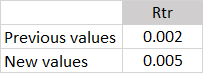

### Model of the SG:
Many unstable cases showed high participation of state variables related to 
- SGN_is_d
- SGN_if_d
  
Therefore, following parameters have been changed.

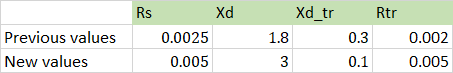

### Generation Unit 
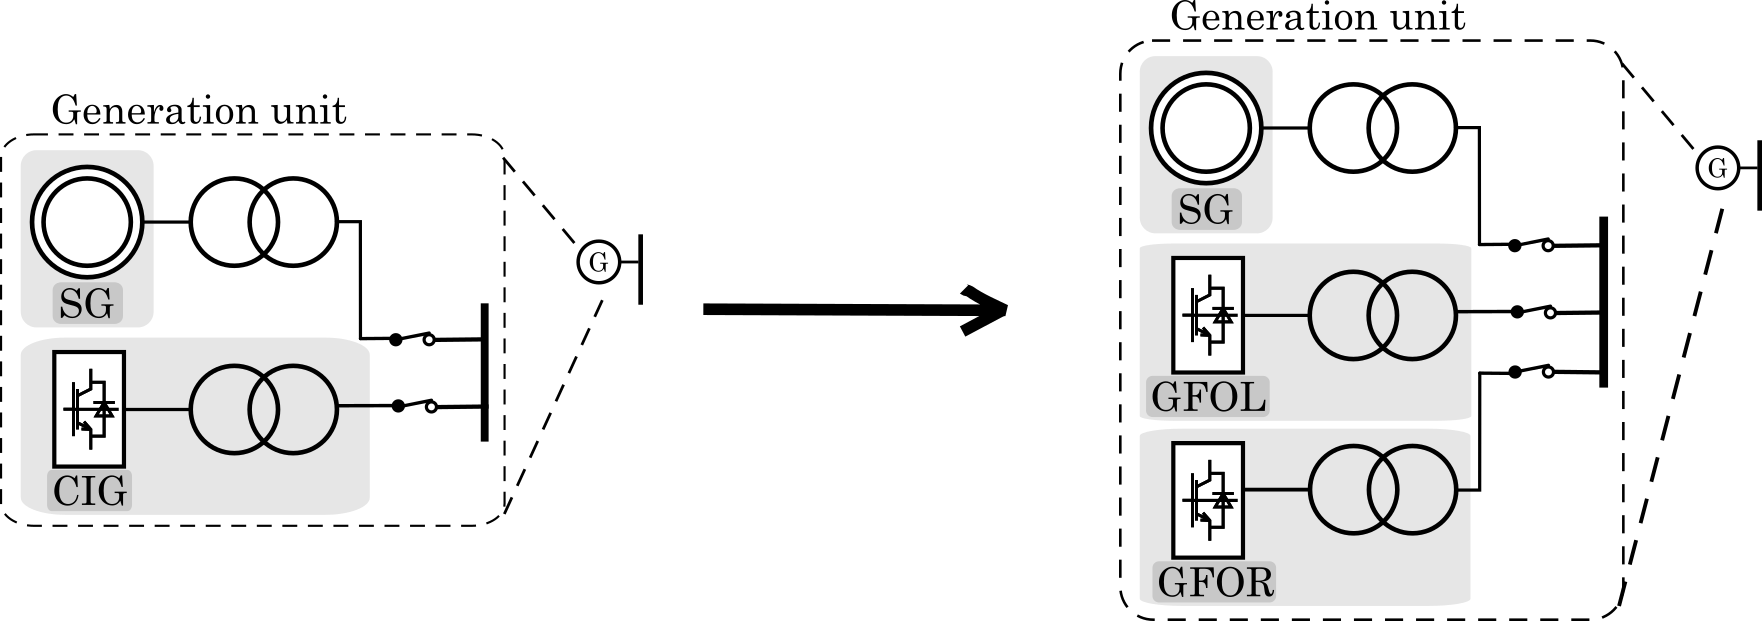
Example of operation:


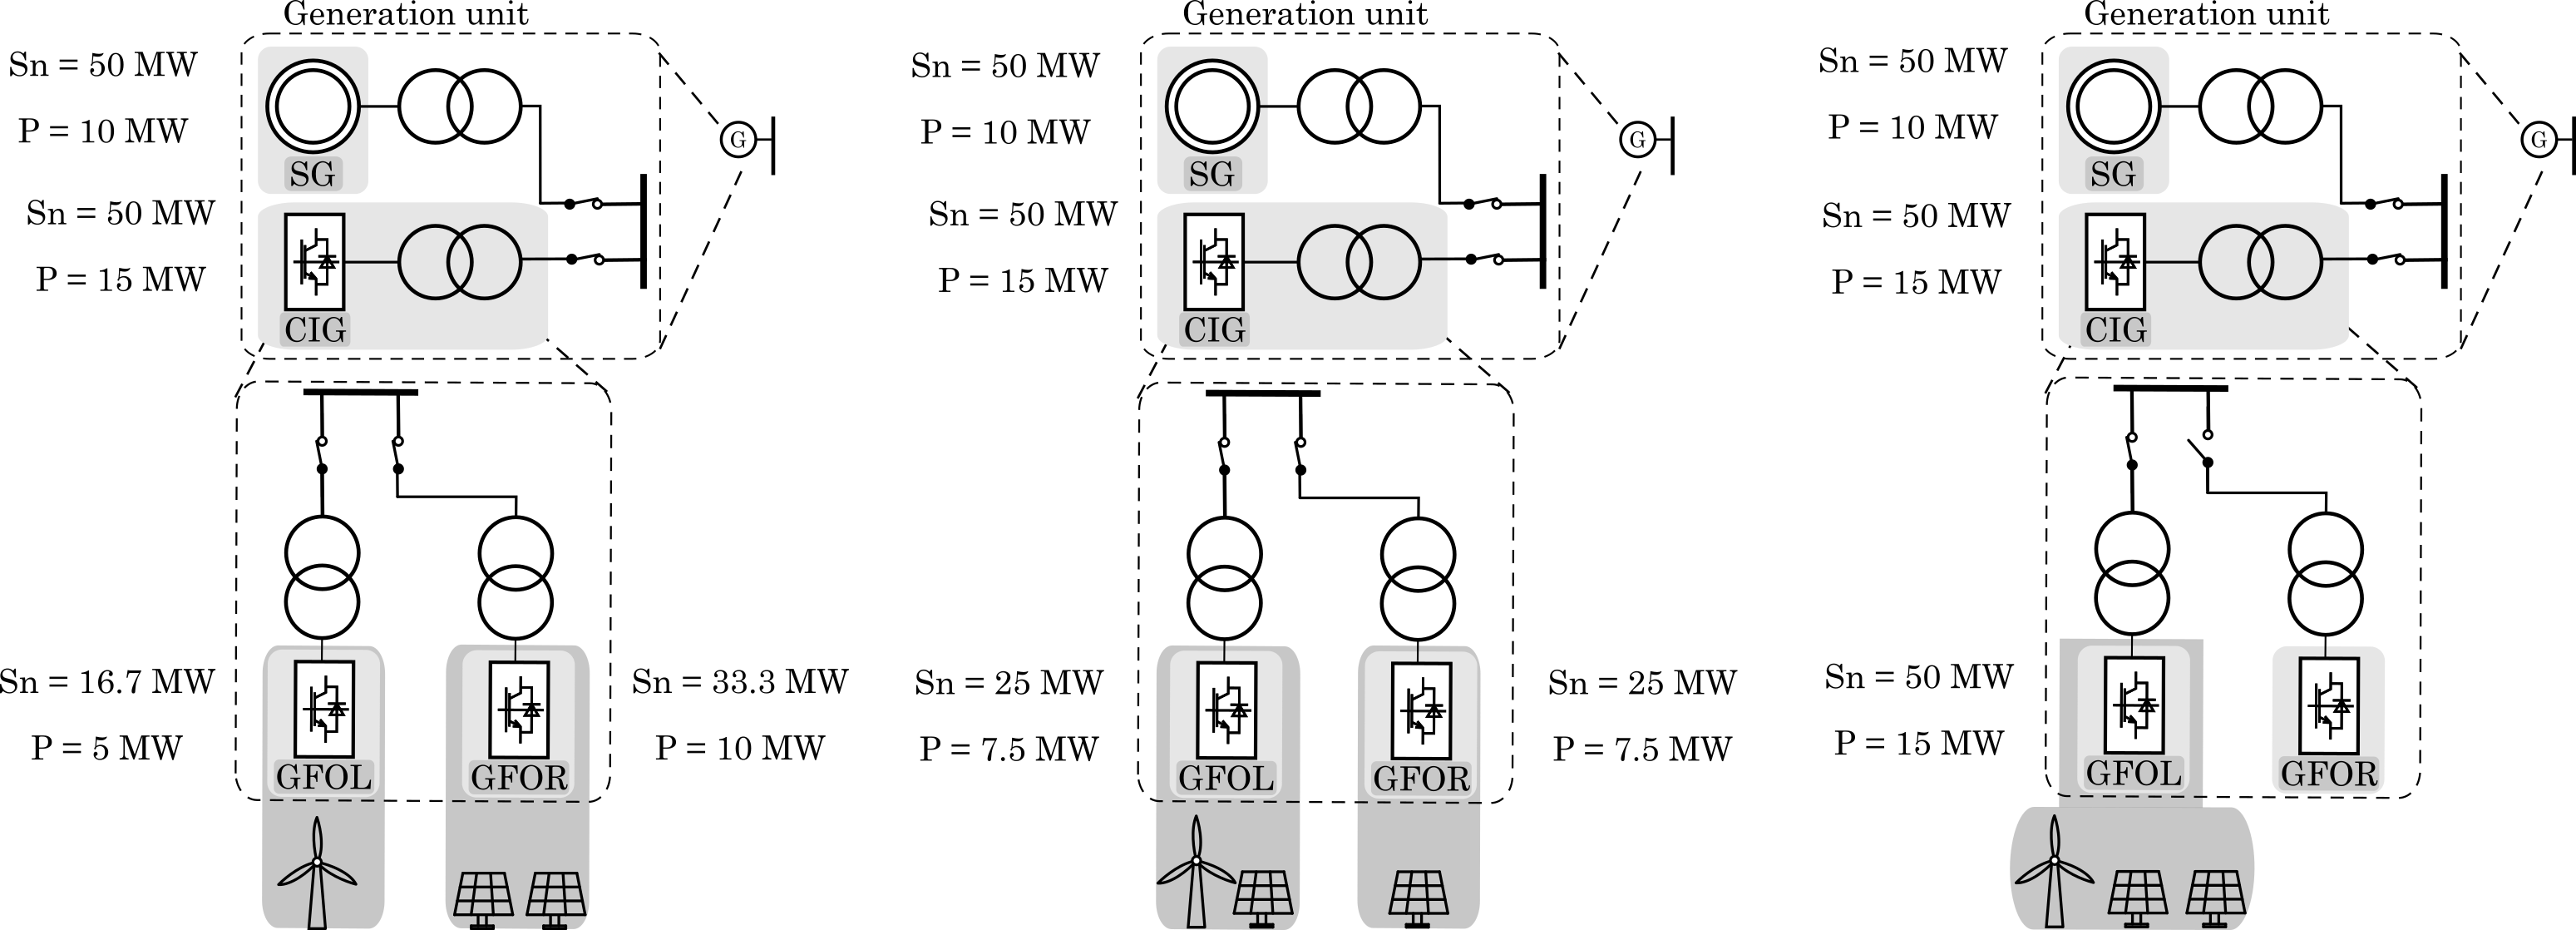


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ACOPF_standalone_NREL_LF09_seed16_nc3_ns100_20241022_175408_4639
Feasible cases: 62.66666666666667%
Stable cases: 44.0% of total cases
Stable cases: 70.2127659574468% of feasible cases
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ACOPF_standalone_NREL_LF1_seed16_nc3_ns100_20241022_144103_3408
Feasible cases: 49.0%
Stable cases: 34.333333333333336% of total cases
Stable cases: 70.06802721088435% of feasible cases
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%